In [1]:
import numpy as np

data = np.load("bg_subtracted_n1000.npy")

In [2]:
data.shape

(128, 128, 1000)

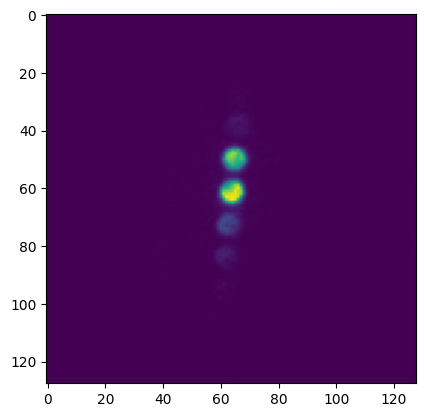

In [5]:
import matplotlib.pyplot as plt
plt.imshow(data[:, :, 499])

In [6]:
from pyempad_calibrate.utils import combine_direct, debounce

In [11]:
import os
print("Reading calibration data")
calib_path = "/home/xarth/codes/xarthisius/pyempad/tests/data"
shape = (128, 128)
g1 = np.concatenate(
        (
            np.fromfile(os.path.join(calib_path, "G1A_prelim.r32"), dtype=np.float32),
            np.fromfile(os.path.join(calib_path, "G1B_prelim.r32"), dtype=np.float32),
        )
    )
g2 = np.concatenate(
        (
            np.fromfile(os.path.join(calib_path, "G2A_prelim.r32"), dtype=np.float32),
            np.fromfile(os.path.join(calib_path, "G2B_prelim.r32"), dtype=np.float32),
        )
    )
off = np.concatenate(
        (
            np.fromfile(os.path.join(calib_path, "B2A_prelim.r32"), dtype=np.float32),
            np.fromfile(os.path.join(calib_path, "B2B_prelim.r32"), dtype=np.float32),
        )
    )
flatfA = np.fromfile(
       os.path.join(calib_path, "FFA_prelim.r32"), dtype=np.float32
    ).reshape(shape, order="F")
flatfB = np.fromfile(
        os.path.join(calib_path, "FFB_prelim.r32"), dtype=np.float32
    ).reshape(shape, order="F")


Reading calibration data


In [12]:
raw_file = "/home/xarth/codes/xarthisius/pyempad/tests/data/raw/n1000.raw"


In [15]:
tot_frames = os.stat(raw_file).st_size // (128 * 128 * 4)
offset = 0
frames = combine_direct(g1, g2, off, raw_file, 1000, offset=offset)

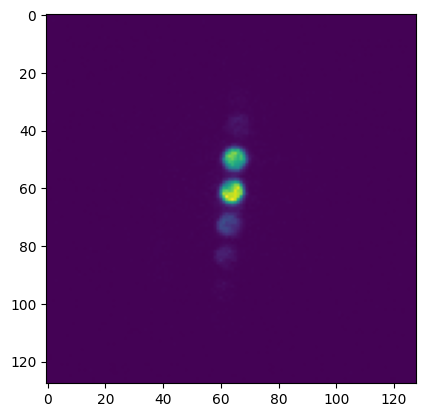

In [20]:
#frames = frames.reshape((shape[0], shape[1], -1), order="F")
plt.imshow(frames[:, :, 499])

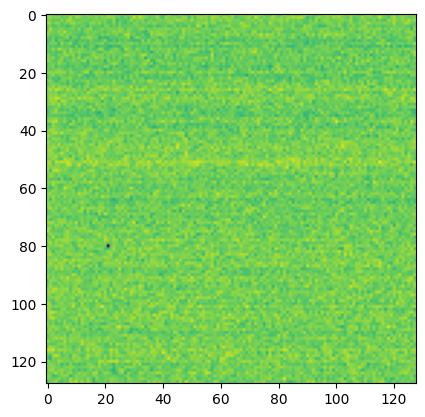

In [21]:
background_file = "/home/xarth/codes/xarthisius/pyempad/tests/data/bkgd/n1000.bkgd"
frames = combine_direct(g1, g2, off, background_file, 1000, offset=0)
frames = frames.reshape((shape[0], shape[1], -1), order="F")
bkgodata = np.mean(frames[:, :, 0::2], axis=2)

plt.imshow(bkgodata)